# Assignment 2

## Part 1

- plot the temperature values and the weekly mean of the temperature values
- for the weekly mean, use the Pandas.Series.rolling() method (e.g. y.rolling())
- use the methods plt.plot() with optional parameters color and label

use methods plt.ylabel(), plt.legend(), plt.grid(), plt.show()

hint: experiment with the sequence your commands

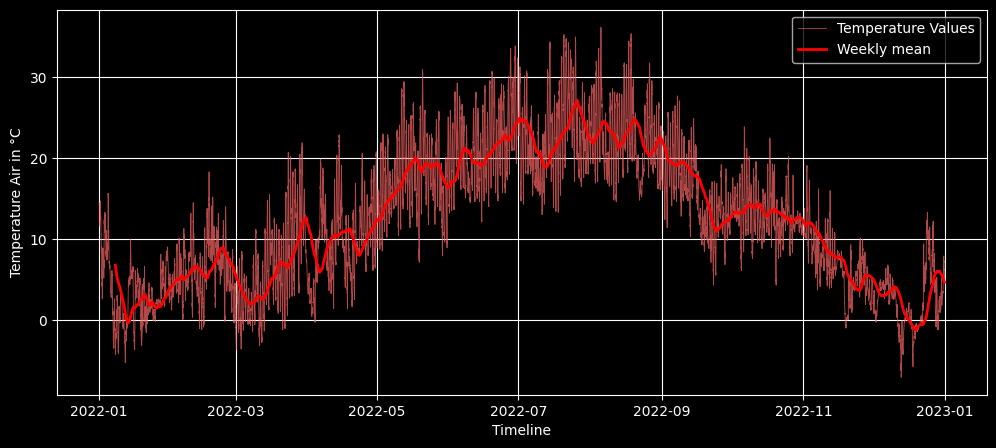

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


def part1_script():
    # get data
    df = pd.read_csv('weather_data.csv', index_col=0)
    df.index = pd.to_datetime(df.index)
    x = df.index
    y = df['Temperature Air in °C']

    # use this dictionary for colors if you like or define your own. access like: somecolors['dark red']
    # these are just to show what color formats are accepted by matplotlib.pyplot
    somecolors = {
        'red': '#FF6666',
        'dark red': '#AA3333',
        'very red': '#FF0000',
        'also very red': (1, 0, 0),
        'another very red': 'red',
        'very green': '#00FF00',
        'very blue': '#0000FF'
    }

    weekly_mean_count = y.rolling(window=7 * 24 * 12).mean()  # 7 days * 24 hours * 12 samples per hour
    plt.figure(figsize=(12, 5))
    plt.plot(x, y, color=somecolors['red'], label='Temperature Values', linewidth=0.6, alpha=0.7)
    plt.plot(x, weekly_mean_count, color=somecolors['another very red'], label='Weekly mean', linewidth=2)
    plt.ylabel('Temperature Air in °C')
    plt.xlabel('Timeline')
    plt.legend()
    plt.grid()
    plt.show()


part1_script()

## Part 2

now use the axes objects to draw plots in them

- in the first one, plot the point cloud temperature over radiation and the above prepared trendline
- in the second one, plot the point cloud humidity over radiation and the above prepared trendline
- use the methods ax[i].scatter(), ax[i].plot(), ax[i].grid()

careful: some methods have different names for axes objects: ax[i].set_xlabel(), ax[i].set_ylabel()

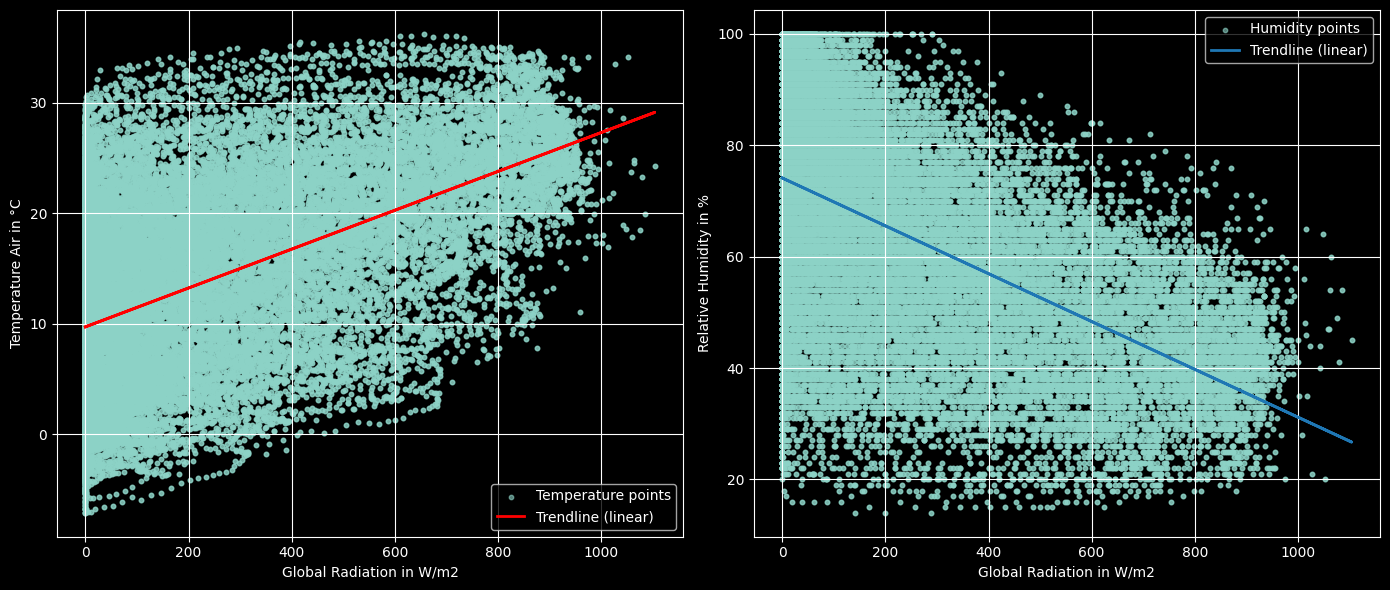

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


def part2_script():
    # get data
    df = pd.read_csv('weather_data.csv', index_col=0)
    df.index = pd.to_datetime(df.index)
    x = df['Global Radiation in W/m2']  # x-values for both plots
    y1 = df['Temperature Air in °C']  # y-values for first plot
    coefficients1 = np.polyfit(x, y1, 1)
    y_trendline1 = np.poly1d(coefficients1)(x)  # y-values of trendline for first plot
    y2 = df['Relative Humidity in %']  # y-values for second plot
    coefficients2 = np.polyfit(x, y2, 1)
    y_trendline2 = np.poly1d(coefficients2)(x)  # y-values of trendline for second plot

    # prepare two plots (this will give you one figure object and one list of axes objects)
    # access the axes objects like ax[0].method() and ax[1].method() to call their methods

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    # first subplot: temperature vs. global radiation
    ax[0].scatter(x, y1, s=10, alpha=0.6, label='Temperature points')
    ax[0].plot(x, y_trendline1, color='red', linewidth=2, label='Trendline (linear)')
    ax[0].set_xlabel('Global Radiation in W/m2')
    ax[0].set_ylabel('Temperature Air in °C')
    ax[0].legend()
    ax[0].grid()

    # second subplot: humidity vs. global radiation
    ax[1].scatter(x, y2, s=10, alpha=0.6, label='Humidity points')
    ax[1].plot(x, y_trendline2, color='tab:blue', linewidth=2, label='Trendline (linear)')
    ax[1].set_xlabel('Global Radiation in W/m2')
    ax[1].set_ylabel('Relative Humidity in %')
    ax[1].legend()
    ax[1].grid()

    fig.tight_layout()
    plt.show()


part2_script()

## Part 3

visualize the correlation matrix of your data
- the correlation matrix of n data sets set[i] i = 1, ..., n is the matrix (correlation(set[i], set[j]) i,j = 1, ..., n
- create the correlation matrix with the method DataFrame.corr() (e.g. df.corr())
- visualize the matrix with the method plt.matshow().
- use the optional parameter cmap to pick a suitable colormap that is helpful for data analysis
- use the optional parameters vmin, vmax to adjust the range of the color scale
- make sure to draw the colorbar with colorbar() to allow interpretation of the plot.
- label the axis ticks with the columns of your dataframe using plt.xticks() and plt.yticks to

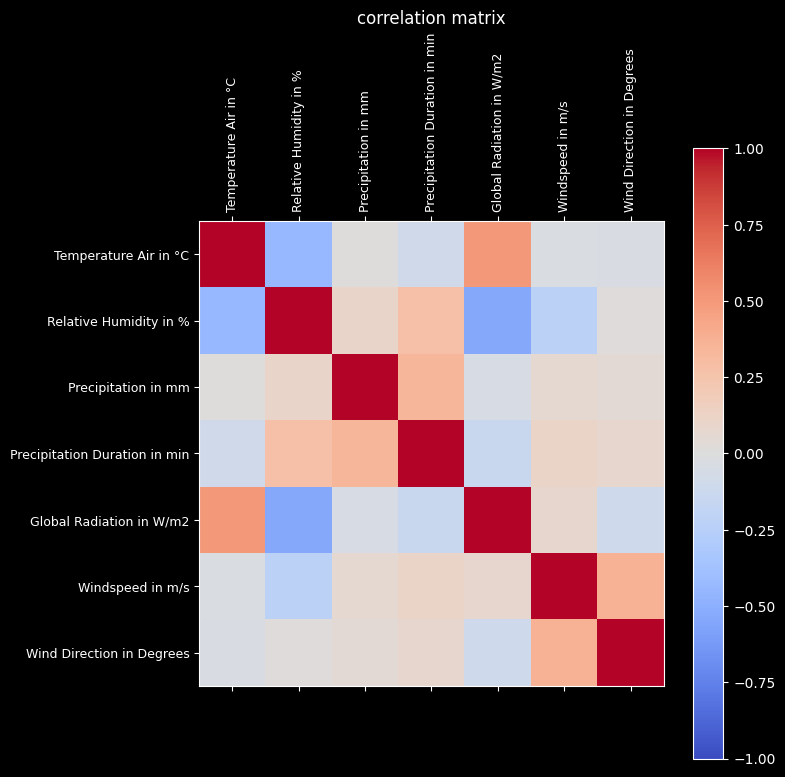

In [3]:
def part3_script():
    # get data
    df = pd.read_csv('weather_data.csv', index_col=0)
    df.index = pd.to_datetime(df.index)
    df_num = df.select_dtypes(include=[np.number])
    cols = df_num.columns
    corr = df_num.corr()

    fig, ax = plt.subplots(figsize=(8, 8))
    cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)

    ax.set_xticks(range(len(cols)))
    ax.set_yticks(range(len(cols)))
    ax.set_xticklabels(cols, rotation=90, fontsize=9)
    ax.set_yticklabels(cols, fontsize=9)
    ax.set_title('correlation matrix')
    plt.tight_layout()
    plt.show()


part3_script()

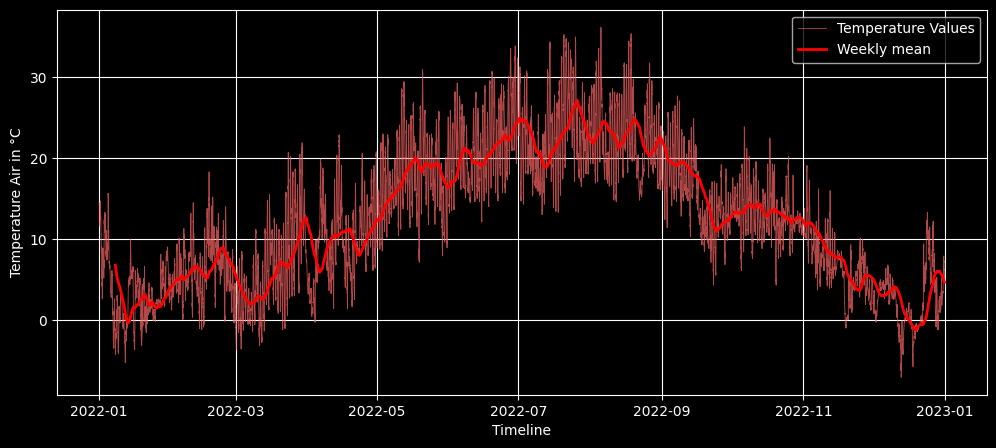

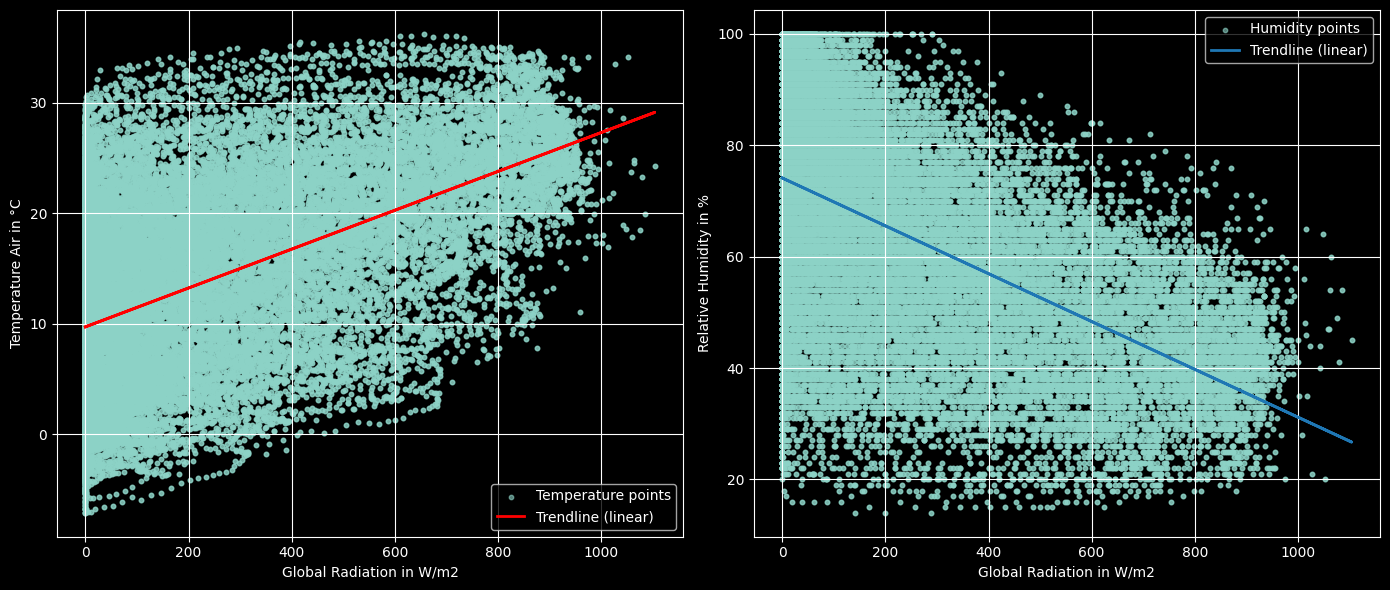

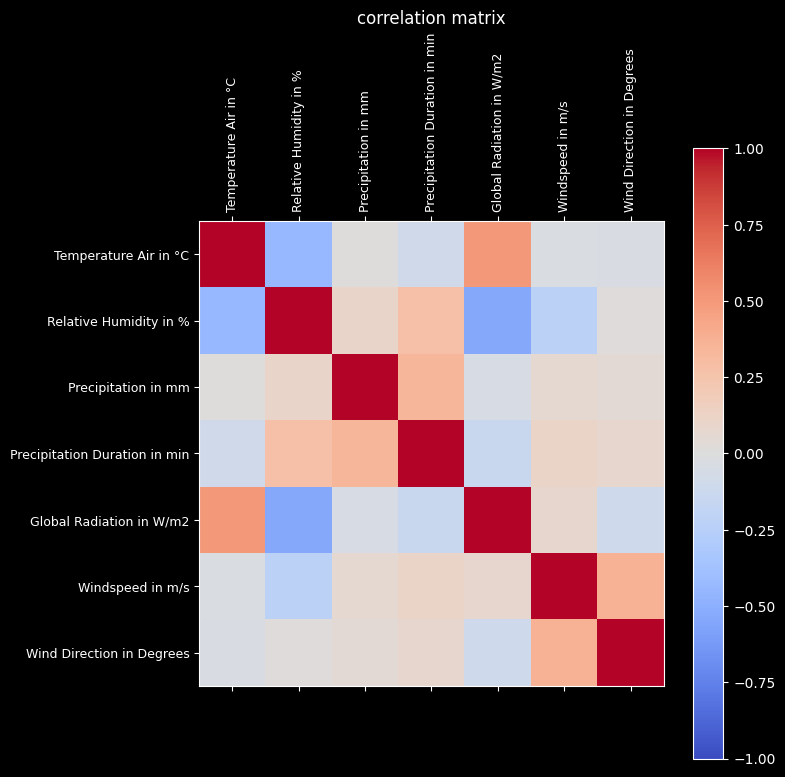

Assignment 2 executed!


In [4]:
if __name__ == '__main__':
    part1_script()
    part2_script()
    part3_script()
    print("Assignment 2 executed!")